# Lab 12: Modeling

This lab is meant to be short so you can experiment with multiple models, feature engineering methods, etc.

## #1

Build a model using the flights data to predict departure delay. Remember to split your data, examine your data, select features, choose some models to try, train the models, and choose one (possibly based on scoring the models).
- Be careful to avoid leakage! Make sure all of your features make sense as predictors.
- Think: do you need a classification or regression model?
    - Some regression models: Linear Regression, Lasso Regression, Decision Tree Regressor, Random Forest Regressor
    - Some classification models: Gaussian Naive Bayes, Decision Tree Classifier, Random Forest Classifier
- You will find that our features include some categorical variables. We did not spend much time on how to deal with categorical (non-numeric) variables in class. You may either A) drop these features or B) if you're feeling ambitious, look into a technique like one-hot encoding. Look at `sklearn.preprocessing.OneHotEncoder`, or the simpler `pd.get_dummies`.

Note that you may not be able to build a very predictive model without substantial feature engineering.
Consider why this might be so.
Would supplemental data improve your model?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
flights = pd.read_csv("flights.csv")
flights.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00


In [2]:
flights.shape

(336776, 19)

In [3]:
flights.index

RangeIndex(start=0, stop=336776, step=1)

In [4]:
flights_na = flights.isnull().sum(axis=0).reset_index()
flights_na.columns = ['variable', 'missing values']
flights_na
#Only very few variables with missing values in very few rows so we can remove them to work with the remaining data to get more qualitative result.
#Removing the rows and not imputing since almost 97% values are complete.

,variable,missing values
0,year,0
1,month,0
2,day,0
3,dep_time,8255
4,sched_dep_time,0
5,dep_delay,8255
6,arr_time,8713
7,sched_arr_time,0
8,arr_delay,9430
9,carrier,0


In [5]:
flights.dropna(inplace = True)
flights.shape

(327346, 19)

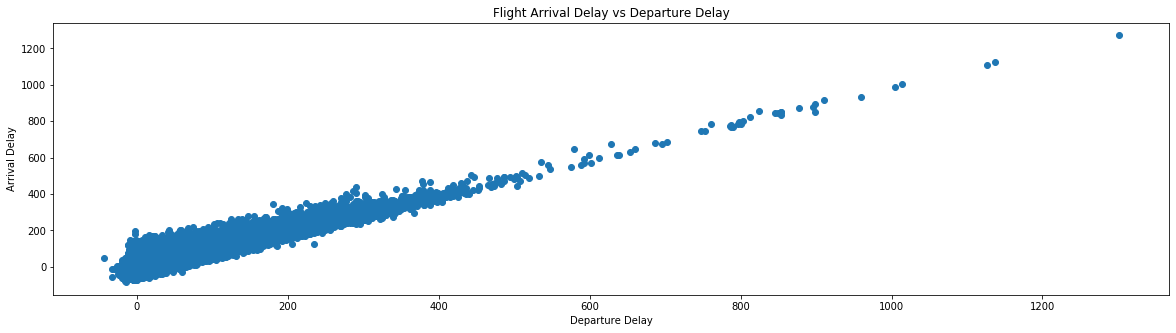

In [6]:
#From our plots from last lab, we know that features like Arrival Delay has an almost linear impact on Departure Delay
fig, ax = plt.subplots(1,1, figsize=(20,5))
ax.scatter('dep_delay','arr_delay',data=flights)
ax.set_title('Flight Arrival Delay vs Departure Delay')
ax.set_xlabel('Departure Delay')
ax.set_ylabel('Arrival Delay');

In [ ]:
sns.pairplot(flights);

In [7]:
#Selecting only cateogrical variables to encode before modeling
#flights_cat = flights[['carrier', 'flight', 'tailnum', 'origin', 'dest']]
#from sklearn.preprocessing import OneHotEncoder
#Creating an encoder
#encoder = OneHotEncoder(sparse = False)
#Fitting encoder onto categorical columns
#encoder.fit(flights_cat)

OneHotEncoder(categorical_features=None, categories=None, drop=None,
              dtype=<class 'numpy.float64'>, handle_unknown='error',
              n_values=None, sparse=False)

In [ ]:
#Transform the columns
#flights_cat_1hot = encoder.transform(flights_cat)
#flights_cat_1hot

In [ ]:
#Convert results back to dataframe
#flights_cat_1hot = pd.DataFrame(flights_cat_1hot, columns=encoder.get_feature_names())
#flights_cat_1hot

In [ ]:
#Append back to original after dropping the columns
#pd.concat([flights.drop(['carrier', 'flight', 'tailnum', 'origin', 'dest'], axis=1), flights_cat_1hot, axis=1])

In [6]:
#Dropping categorical feature variables for now. Also removing other variables deemed uneccessary for now.
flights = flights[['dep_time', 'sched_dep_time', 'dep_delay', 'arr_time', 'sched_arr_time', 'arr_delay', 'air_time', 'distance']]
flights.head()

,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,air_time,distance
0,517.0,515,2.0,830.0,819,11.0,227.0,1400
1,533.0,529,4.0,850.0,830,20.0,227.0,1416
2,542.0,540,2.0,923.0,850,33.0,160.0,1089
3,544.0,545,-1.0,1004.0,1022,-18.0,183.0,1576
4,554.0,600,-6.0,812.0,837,-25.0,116.0,762


In [7]:
#Setting the feature variables
X = flights[['dep_time', 'sched_dep_time','arr_time', 'sched_arr_time', 'arr_delay', 'air_time', 'distance' ]]
X.head()

,dep_time,sched_dep_time,arr_time,sched_arr_time,arr_delay,air_time,distance
0,517.0,515,830.0,819,11.0,227.0,1400
1,533.0,529,850.0,830,20.0,227.0,1416
2,542.0,540,923.0,850,33.0,160.0,1089
3,544.0,545,1004.0,1022,-18.0,183.0,1576
4,554.0,600,812.0,837,-25.0,116.0,762


In [9]:
#Setting the response variable
y = flights['dep_delay']
y.head()

0    2.0
1    4.0
2    2.0
3   -1.0
4   -6.0
Name: dep_delay, dtype: float64

In [15]:
#Splitting the data = 75-25 split
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,random_state = 2)

In [17]:
#We need a regression model since the dep_delay values are continuous hence import all Regression models
from sklearn.linear_model import Lasso,LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import numpy as np

#Create classes for each model.
Las = Lasso()
LinR = LinearRegression()
Rid = Ridge()
Rfc = RandomForestRegressor(random_state=2)
Dtc = DecisionTreeRegressor(random_state = 2)

In [20]:
#Running a loop for each model to find mean squared erros, R2 and prediction level of each to compare.
for model, name in zip([Las,LinR,Rid,Dtc,Rfc], 
     ['Lasso','Linear Regression','Ridge','Decision Tree Regressor','Random Forest Regressor']):
    model1 = model.fit(Xtrain,ytrain)
    Ypredict=model1.predict(Xtest)
    print(name)
    print('Mean Absolute Error:', mean_absolute_error(ytest, Ypredict))  
    print('Mean Squared Error:', mean_squared_error(ytest, Ypredict))  
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(ytest, Ypredict)))
    print('R2 : ',r2_score(ytest, Ypredict))
    print()

Lasso
Mean Absolute Error: 9.949038888285731
Mean Squared Error: 198.42459729247932
Root Mean Squared Error: 14.086326607475751
R2 :  0.8768468113417213

Linear Regression
Mean Absolute Error: 9.953392655274731
Mean Squared Error: 198.41263935744053
Root Mean Squared Error: 14.085902149221416
R2 :  0.8768542330920984

Ridge
Mean Absolute Error: 9.953392641325275
Mean Squared Error: 198.41263937161466
Root Mean Squared Error: 14.085902149724548
R2 :  0.8768542330833012

Decision Tree Regressor
Mean Absolute Error: 3.457641409142564
Mean Squared Error: 56.85998998008236
Root Mean Squared Error: 7.540556344201823
R2 :  0.9647095714509467

Random Forest Regressor
Mean Absolute Error: 2.7142783826386596
Mean Squared Error: 27.89947236580031
Root Mean Squared Error: 5.281995112246916
R2 :  0.9826840571652148



## Challenge (*not required*)

If you are familiar with grid search, try using scikit-learn's [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to choose hyperparameters for your model -- or even to choose a type of model.
An example is [here](https://scikit-learn.org/stable/modules/grid_search.html#exhaustive-grid-search).

This will likely require a fair amount of experimentation to get right, but doing hyperparameter tuning automatically is a great feature of scikit-learn.